# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


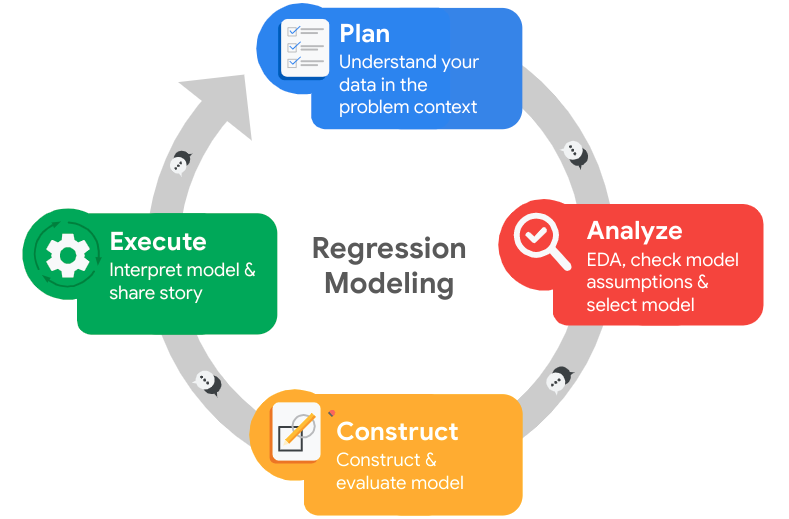

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

> The leadership team of the company is my final audience. Also, the HR team is a functional team audience that I need to talk with as well. These two groups are the stakeholders of the project.

> The main objective of the project is to generate a statistical / ML model that predicts whether an employee will leave the company or not, to increase employee retention.

> The data doesn’t have any nulls, but I need to check for duplicates and outliers in the different variables. Also, I think I will need to engineer some variables and relabel others.

> The full list of previous works done in jupyter notebooks related the waze project: https://github.com/cjmp21/waze_business_case_projects/blob/main/waze_ml_models_project/Waze_Machine_Learning_Models_Project_Lab_CM.ipynb 

> I do not.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt_2

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# This is the classifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###

df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include= "all")

# The dataset has 14,999 records, and 10 variables, from which one is the dependant variable ("left")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(str.lower, axis='columns')
df0 = df0.rename(columns={"last_evaluation": "last_perfomance_review", "number_project": "number_of_projects", "time_spend_company":"tenure_in_the_company", "work_accident":"work_accident_probability","left":"turnout","salary":"salary_category"})

# Display all column names after the update
### YOUR CODE HERE ###
df0.dtypes

satisfaction_level           float64
last_perfomance_review       float64
number_of_projects             int64
average_montly_hours           int64
tenure_in_the_company          int64
work_accident_probability      int64
turnout                        int64
promotion_last_5years          int64
department                    object
salary_category               object
dtype: object

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

# There are no missing values in the data

satisfaction_level           0
last_perfomance_review       0
number_of_projects           0
average_montly_hours         0
tenure_in_the_company        0
work_accident_probability    0
turnout                      0
promotion_last_5years        0
department                   0
salary_category              0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
duplicates = df0.duplicated().sum()
total = df0["satisfaction_level"].count()
rate = f"{round((duplicates / total)*100,2)}%"

print("Total duplicates: %2.f" % duplicates)
print("Total records: %2.f" % total)
print("Duplicates rate: "+rate)

Total duplicates: 3008
Total records: 14999
Duplicates rate: 20.05%


In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###

df0[df0.duplicated()].head()

,satisfaction_level,last_perfomance_review,number_of_projects,average_montly_hours,tenure_in_the_company,work_accident_probability,turnout,promotion_last_5years,department,salary_category
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df_wo_duplicates = df0.dropna()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df_wo_duplicates.head()

,satisfaction_level,last_perfomance_review,number_of_projects,average_montly_hours,tenure_in_the_company,work_accident_probability,turnout,promotion_last_5years,department,salary_category
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Employees by tenure in the company')

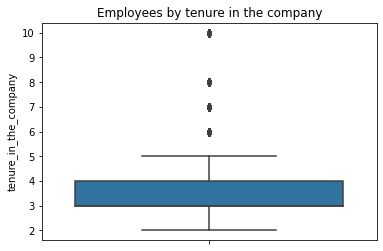

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

g = sns.boxplot(data=df_wo_duplicates,
            y = 'tenure_in_the_company',
            showfliers=True
            );
g.set_title('Employees by tenure in the company')

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

df_wo_duplicates[df_wo_duplicates["tenure_in_the_company"] > 5]["tenure_in_the_company"].count()

# 1,282 outliers in the data for this variable

1282

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

> I observe that thre are promising variables such as salary range and satisfaction level. Others are less promising.

> Some variables like average hours worked and number of projects are multimodal when compared against the turnout variable. Other variables like satisfaction and salary range have a clear tendency towards the turnout variable or rate.

>I did two transformations to the data. Number of projects and average working hours seem to be needing refactoring, because these variables are bimodal when compared against the turnover variable. Number of projects should be turned to 3_or_less_projects/more_than_3_projects and average working hours to below_180_avg_working_hours/above_180_avg_working_hours. Also, since the Tenure variable has a lot of outliers, it is a candidate to be cleansed (records > percentile_90 substituded with percentile_90).

> Validate the assumptions of the models (regression models in particular) are met. Identify possible good candidate variables for the model, validate the completeness and variability of the data and, also, validate that no explanatory variable are correlated

> The full list of previous works done in jupyter notebooks related the waze project: https://github.com/cjmp21/waze_business_case_projects/blob/main/waze_full_exploratory_data_analysis_project/Waze_EDA_Project_Lab_CM.ipynb

> The only ethical consideration I have is the variable regarding injuries. I would like to validate if that is the main explanatory variable for the turnout, because if that is the case, there is a security problem going on in the company.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
turnout = df_wo_duplicates.groupby('turnout').count()[['satisfaction_level']]
turnout['total_records'] = sum(turnout['satisfaction_level'])
turnout['percent_of_total'] = turnout['satisfaction_level'] / turnout['total_records']
turnout

# 76% of employees stayed within the company, and 23.8% left

,satisfaction_level,total_records,percent_of_total
turnout,,,
0,11428,14999,0.761917
1,3571,14999,0.238083


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0, 0.5, 'Number of projects')

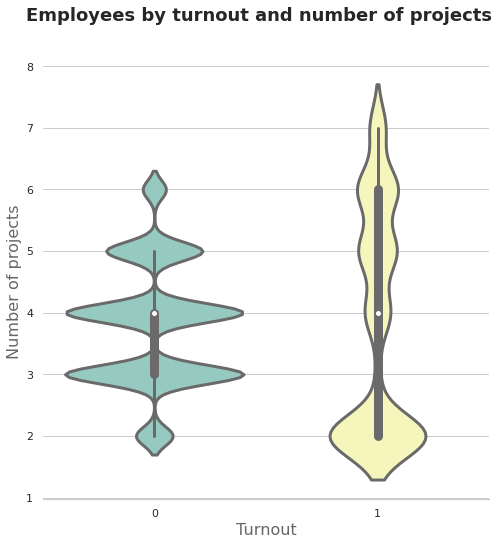

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
import matplotlib.pyplot as mplot

sns.set(style="whitegrid")

f, ax = mplot.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="turnout",y="number_of_projects",data=df_wo_duplicates, inner="box", palette="Set3", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Employees by turnout and number of projects', fontsize=18, fontweight='bold')
ax.set_xlabel("Turnout",size = 16,alpha=0.7)
ax.set_ylabel("Number of projects",size = 16,alpha=0.7)

# Even when the median is the same, the variabce is different between number of projects. This variable can be engineered (at 3)

Text(0, 0.5, 'Average Monthly Hours')

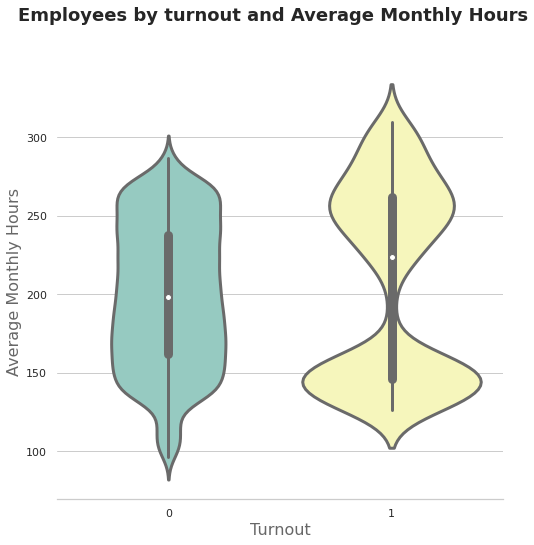

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.set(style="whitegrid")

f, ax = mplot.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="turnout",y="average_montly_hours",data=df_wo_duplicates, inner="box", palette="Set3", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Employees by turnout and Average Monthly Hours', fontsize=18, fontweight='bold')
ax.set_xlabel("Turnout",size = 16,alpha=0.7)
ax.set_ylabel("Average Monthly Hours",size = 16,alpha=0.7)

# Avg monthly hours  seems to be relevant (can be engineered at 200hours)

Text(0, 0.5, 'Last Performance Review')

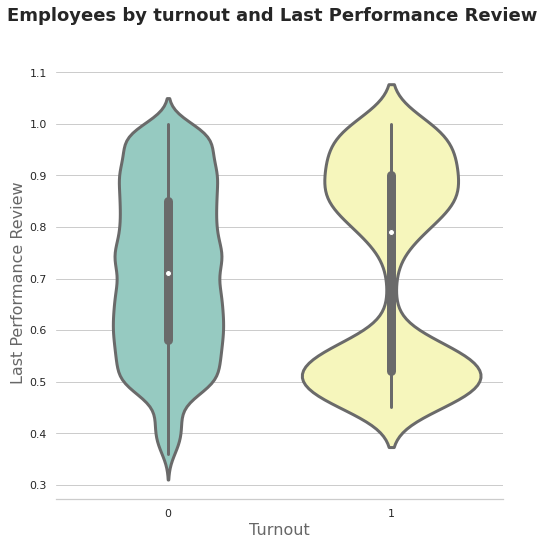

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.set(style="whitegrid")

f, ax = mplot.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="turnout",y="last_perfomance_review",data=df_wo_duplicates, inner="box", palette="Set3", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Employees by turnout and Last Performance Review', fontsize=18, fontweight='bold')
ax.set_xlabel("Turnout",size = 16,alpha=0.7)
ax.set_ylabel("Last Performance Review",size = 16,alpha=0.7)

# Last performance review seems to be relevant

Text(0, 0.5, 'Satisfaction Level')

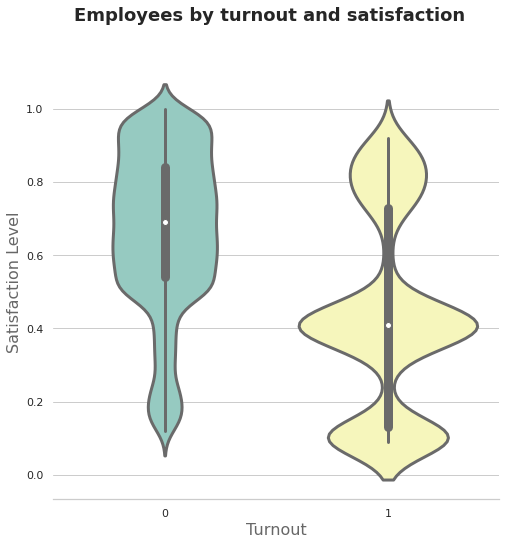

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
# Turnout by satisfaction level
sns.set(style="whitegrid")

f, ax = mplot.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="turnout",y="satisfaction_level",data=df_wo_duplicates, inner="box", palette="Set3", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Employees by turnout and satisfaction', fontsize=18, fontweight='bold')
ax.set_xlabel("Turnout",size = 16,alpha=0.7)
ax.set_ylabel("Satisfaction Level",size = 16,alpha=0.7)

# Satisfaction seems to be relevant

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
# Turnout by work probability

cross_table = pd.crosstab(df_wo_duplicates['turnout'], df_wo_duplicates['work_accident_probability'], values=df_wo_duplicates['satisfaction_level'], aggfunc='count')
cross_table

# work accident doesn't seem to be relevant

work_accident_probability,0,1
turnout,,
0,9428,2000
1,3402,169


Text(0, 0.5, 'Turnover rate')

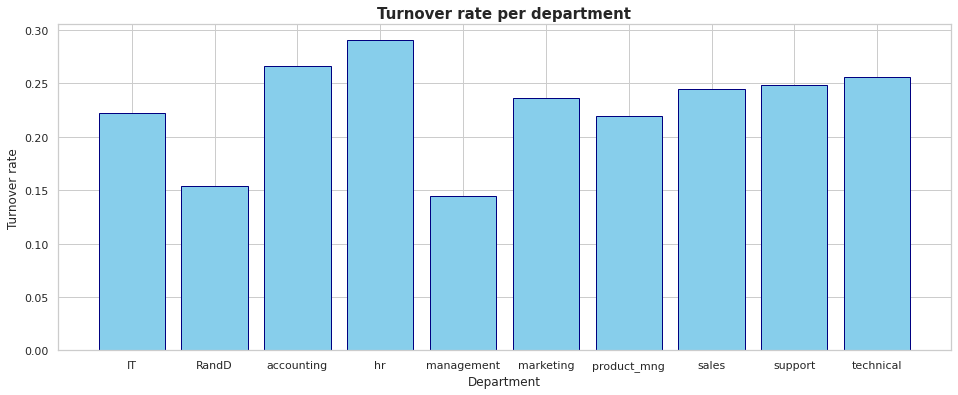

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

# Vertical Bar Plot
department = df_wo_duplicates.groupby("department").sum()[["turnout"]]
department["total_employees"] = df_wo_duplicates.groupby("department").count()[["turnout"]]
department["churn_rate"] = department["turnout"] / department["total_employees"]
department = department.reset_index(drop=False)
department

# bar char, add churn label in each columb
mplot.figure(figsize=(16, 6))
mplot.bar(department['department'], department['churn_rate'], color='skyblue', edgecolor='navy')
mplot.title('Turnover rate per department', fontsize=15, fontweight='bold')
mplot.xlabel('Department', fontsize=12)
mplot.ylabel('Turnover rate', fontsize=12)

# Department category seems to be relevant

Text(0, 0.5, 'Turnover rate')

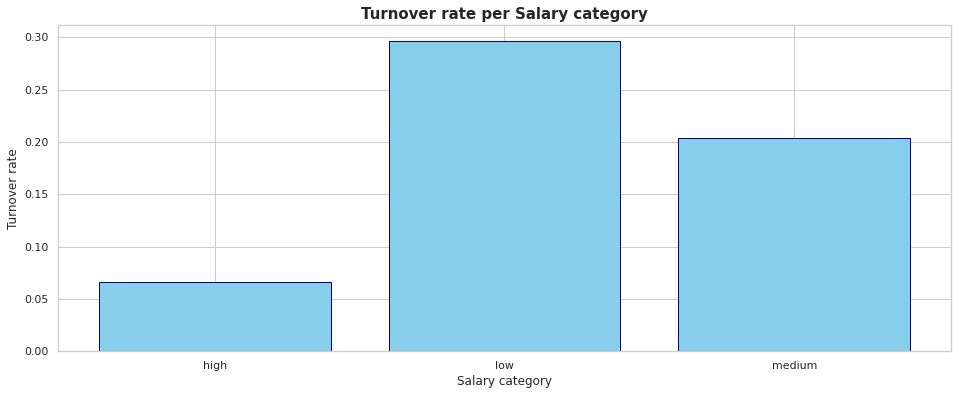

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
# Vertical Bar Plot
salary = df_wo_duplicates.groupby("salary_category").sum()[["turnout"]]
salary["total_employees"] = df_wo_duplicates.groupby("salary_category").count()[["turnout"]]
salary["churn_rate"] = salary["turnout"] / salary["total_employees"]
salary = salary.reset_index(drop=False)
salary

# bar char, add churn label in each columb
mplot.figure(figsize=(16, 6))
mplot.bar(salary['salary_category'], salary['churn_rate'], color='skyblue', edgecolor='navy')
mplot.title('Turnover rate per Salary category', fontsize=15, fontweight='bold')
mplot.xlabel('Salary category', fontsize=12)
mplot.ylabel('Turnover rate', fontsize=12)

# Salary category seems to be relevant

Text(0, 0.5, 'Tenure in the company')

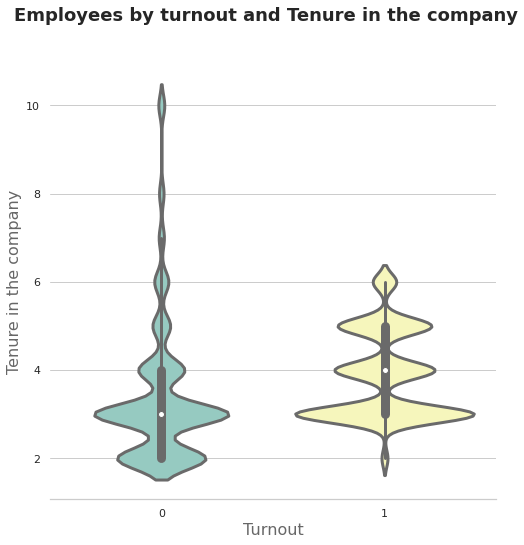

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.set(style="whitegrid")

f, ax = mplot.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="turnout",y="tenure_in_the_company",data=df_wo_duplicates, inner="box", palette="Set3", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Employees by turnout and Tenure in the company', fontsize=18, fontweight='bold')
ax.set_xlabel("Turnout",size = 16,alpha=0.7)
ax.set_ylabel("Tenure in the company",size = 16,alpha=0.7)

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

cross_table = pd.crosstab(df_wo_duplicates['turnout'], df_wo_duplicates['promotion_last_5years'], values=df_wo_duplicates['satisfaction_level'], aggfunc='count')
cross_table

#promotion last 5 years doesn't seem to be a relevant variable

promotion_last_5years,0,1
turnout,,
0,11128,300
1,3552,19


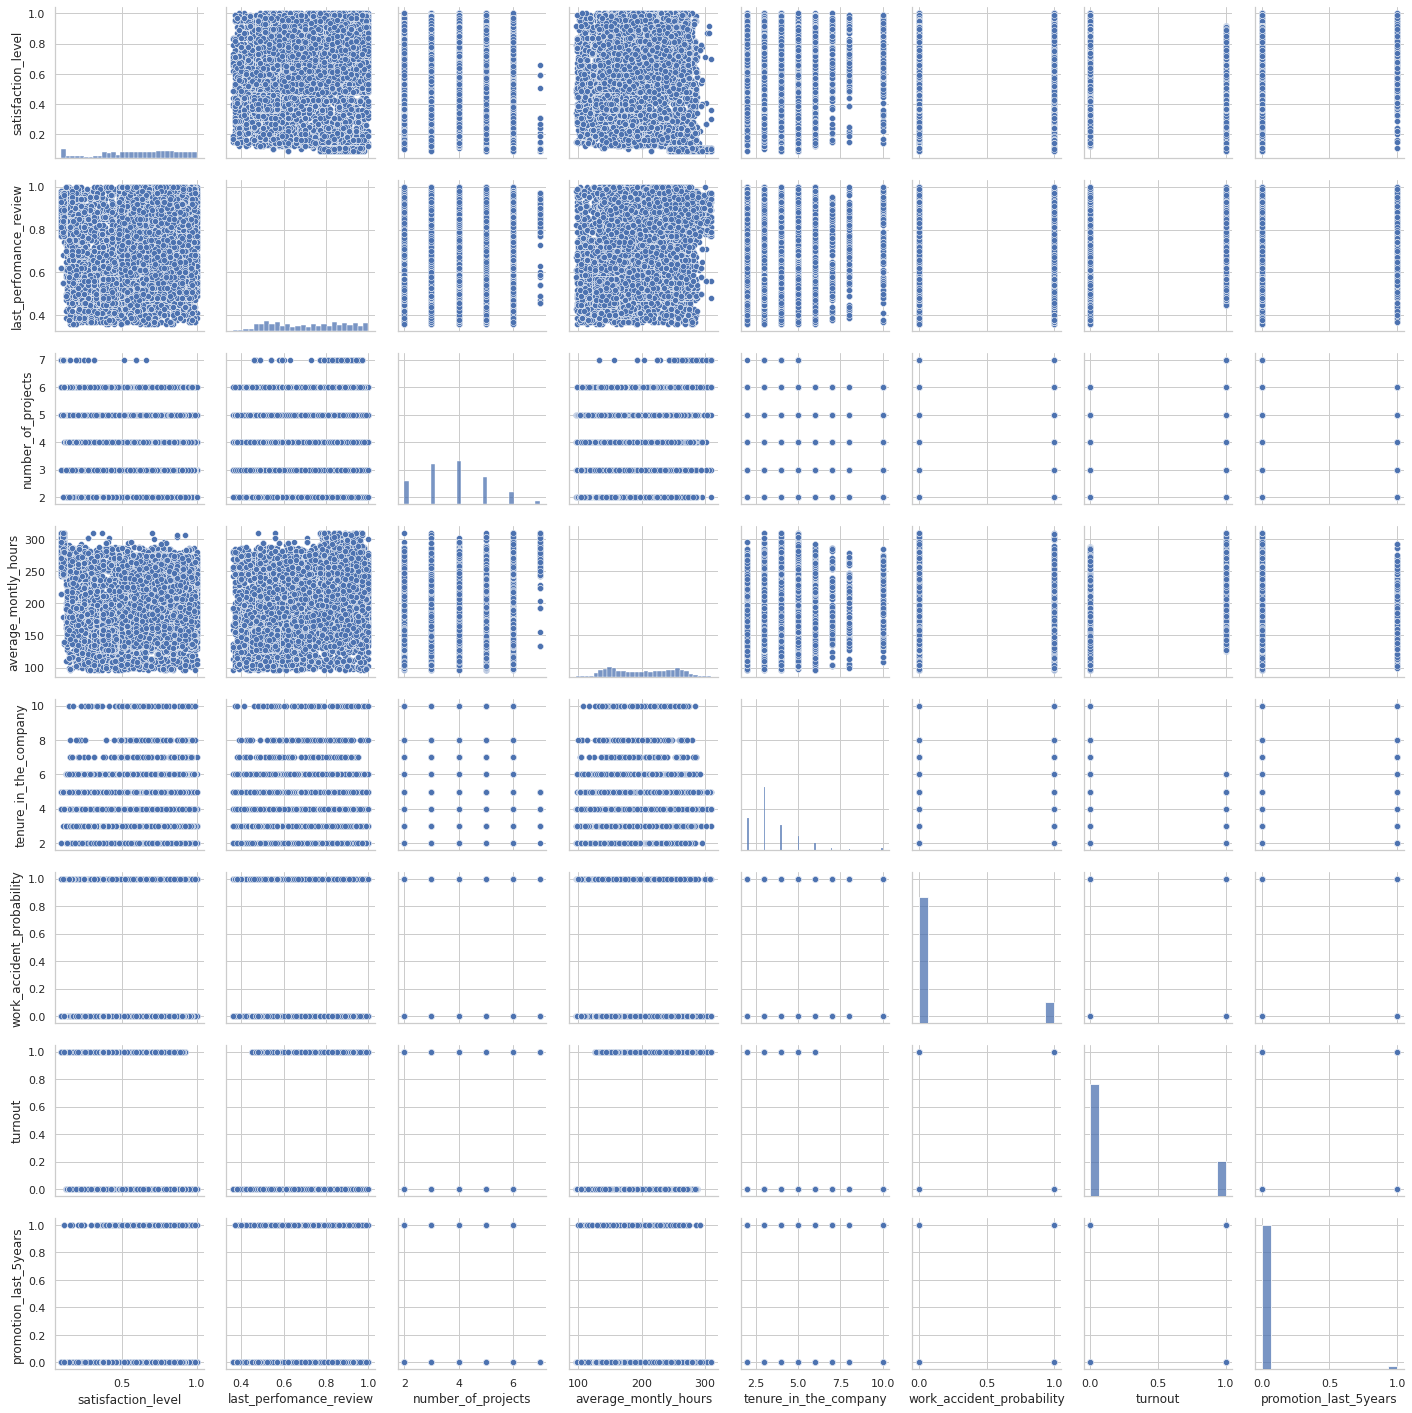

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df_wo_duplicates)

In [24]:
df_encoded = pd.get_dummies(df_wo_duplicates['salary_category'], prefix='salary')
df_encoded_2 = pd.get_dummies(df_wo_duplicates['department'], prefix='department')
combined_df = pd.concat([df_wo_duplicates.drop(["salary_category","department"], axis=1), df_encoded], axis=1)
combined_df = pd.concat([combined_df, df_encoded_2], axis=1)
combined_df


,satisfaction_level,last_perfomance_review,number_of_projects,average_montly_hours,tenure_in_the_company,work_accident_probability,turnout,promotion_last_5years,salary_high,salary_low,salary_medium,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


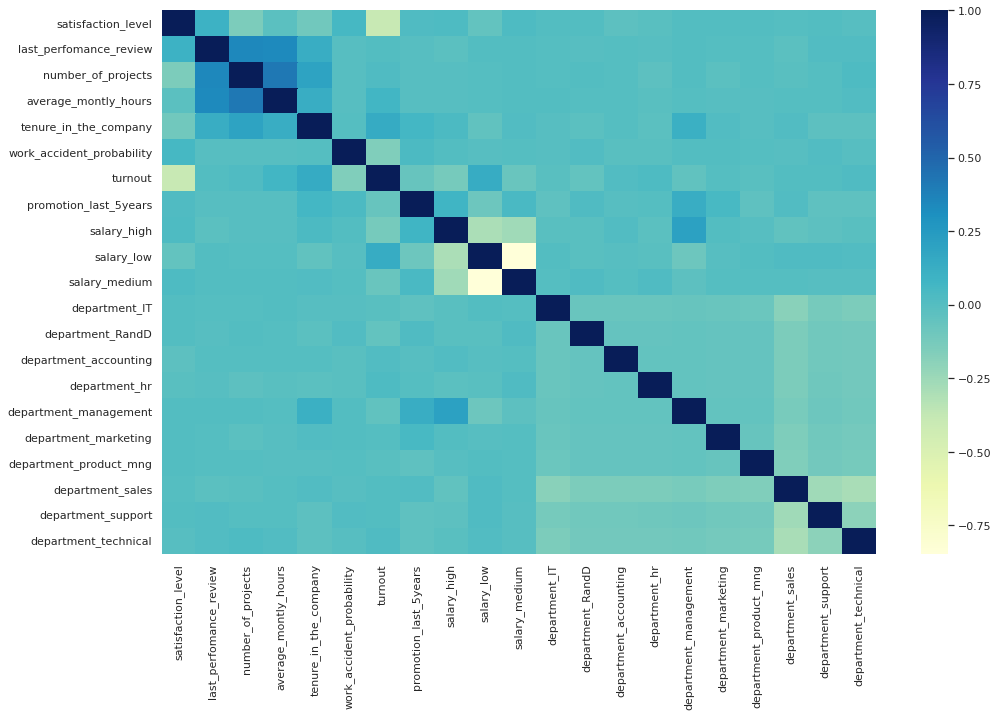

In [25]:
# calculating correlation matrix
# plotting correlation heatmap 
mplot.figure(figsize=(16, 10))

dataplot = sns.heatmap(combined_df.corr(), cmap="YlGnBu") 
  
# displaying heatmap and the correlations against the churned_bg column
mplot.show() 

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

> I encoded two category variables that are relevant when calculated the turnout rate by them (salary and department). Also, two variables seem to be not relevant: promotion_last_5years and work_accident_probability, but this should be confirming when modelling. All the other variables seem to be relevant, because of their variability when comparing employees that left the company against the ones who doesn't.

> Another insight is that number of projects and average working hours seem to need a refactoring, because these variables are bimodal when compared against the turnover variable. Number of projects should be turned to 3_or_less_projects/more_than_3_projects and average working hours to below_180_avg_working_hours/above_180_avg_working_hours. Also, since the Tenure variable has a lot of outliers, it is a candidate to be cleansed (records > percentile_90 substituded with percentile_90).

> Satisfaction, last performance review and salary, seem to be the most relevant variables. In fact, satisfaction level has a -0.75 correlation coefficient against turnout.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

> I notice that the regression model has a far less recall score (40%) when compared with ML models (Random Forest & CGBoost, >90%). Also, variables that are relevant in the regression model (like salary_high) are not too relevant when doing the ML models.

> I choosed to use all the independent variables I had at my disposal, this to try to get the best explainatory power. However, some of the engineered variables were very relevant (number of projects), but other not (department).

> The multicolinearity assumption is not met between salary_medium and salary_low variables (see correlation matrix). Regarding the ML models, they don't require data assumptions.

> The logistic regression model is not too good (around 40% of recall), see the following numbers:

| model |	precision |	recall |	F1	| accuracy |
| Logistic Regression (Validation) | 0.6224 | 0.43561 | 0.512516 |	0.802667 |

> However, the ML models fit much better the data, and the XGBoost model is the best one (with more than 90% in each score):

| model	| precision | recall | F1 |	accuracy |

| XG Boost CV (Training) | 0.979572 | 0.956138 | 0.967680 |	0.984776 |

| XG Boost CV (Validation) |	0.985612 |	0.959384 |	0.972321 |	0.987000 |

| XG Boost CV (Testing) |	0.982882 |	0.964986 |	0.973852 |	0.987667 |


> I think teh testing XGBoost model is an excelent model that predicts around 96% of all the positive turnout rate of the company.

> I found usefull the following two jupyter notebooks: https://github.com/cjmp21/waze_business_case_projects/blob/main/waze_regression_models_project/Waze_Regression_Models_Project_Lab_CM.ipynb, https://github.com/cjmp21/waze_business_case_projects/blob/main/waze_ml_models_project/Waze_Machine_Learning_Models_Project_Lab_CM.ipynb

> I do not have any ethical consideration, since the work_accident variable is one of the less relevant variables in the final model selected. This implies that a solid case can be made for this variable to not be relevant in estimating the turnout rate.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

This is a binary outcome variable model task. So, a logistic regression or a ML model with a binary response variable is required to solve it.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

> I think that a Logistic Regression, a Random Forest and a Extreme Gradient Boosting models will be very usefull in answering this task.

### Modeling

Add as many cells as you need to conduct the modeling process.

#### Feature engineering of identified variables (number_of_projects, average_working_hours)

In [26]:
### YOUR CODE HERE ###
# creating 3_or_less_projects and below_180_avg_working_hours variables
combined_df["3_or_less_projects"] = np.where(combined_df["number_of_projects"] <= 3, 1, 0)
combined_df["below_180_avg_working_hours"] = np.where(combined_df["average_montly_hours"] <= 180, 1, 0)
combined_df.head(5)

,satisfaction_level,last_perfomance_review,number_of_projects,average_montly_hours,tenure_in_the_company,work_accident_probability,turnout,promotion_last_5years,salary_high,salary_low,salary_medium,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,3_or_less_projects,below_180_avg_working_hours
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1


In [27]:
### YOUR CODE HERE ###
# Impute outliers of the tenure_in_the_company variable (90%)
# Impute outliers
### YOUR CODE HERE ###
def replace_upper_outlier(dataframe, column):
    '''
    docstring: replace upper outliers with the 95th percentile inside a column in a dataframe
    variables:
    dataframe: the dataframe evaluated
    column: the column evaluated
    '''
    
    dataframe[column] = dataframe[column].clip(upper=dataframe[column].quantile(0.90))

replace_upper_outlier(combined_df, 'tenure_in_the_company')

Text(0.5, 1.0, 'Employees by tenure in the company')

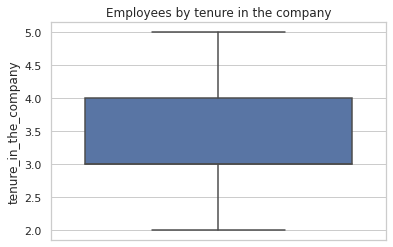

In [28]:
#Validating that the outlier replacement worked
### YOUR CODE HERE ###

g = sns.boxplot(data=combined_df,
            y = 'tenure_in_the_company',
            showfliers=True
            );
g.set_title('Employees by tenure in the company')

#### Model Building
##### Proposed models:
- Logistic Regression
- ML Models: RF, XGBoost (Gradient Boosting)
- Select the winner

##### Logistic Regression Model

In [29]:
# Modeling Logistic regression

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# isolate predictor and predicted variables
x = combined_df.drop(columns=['turnout']) #filtering out number_of_projects since it has >0.5 correlation with working hours
y = combined_df["turnout"]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=42, stratify=y) #test_size=0.3,

# Use scikit-learn to instantiate a logistic regression model
log_regression = LogisticRegression(penalty = "none", max_iter=500).fit(X_train,y_train)

coefficients = log_regression.coef_
col_names = X_train.columns.tolist()
coefficients = coefficients.flatten()

# Print log regression coeficients
log_reg_coeficcients = pd.Series(data=coefficients, index=col_names)
log_reg_intercept = log_regression.intercept_

print(log_reg_coeficcients)
print("")
log_reg_coeficcients = pd.Series(data=coefficients, index=col_names)
print(log_reg_intercept)


satisfaction_level            -3.865181
last_perfomance_review         0.491120
number_of_projects            -0.502522
average_montly_hours           0.023019
tenure_in_the_company          0.834903
work_accident_probability     -1.592019
promotion_last_5years         -1.473355
salary_high                   -2.578898
salary_low                    -0.668800
salary_medium                 -1.194944
department_IT                 -0.641275
department_RandD              -1.035599
department_accounting         -0.354932
department_hr                 -0.035871
department_management         -0.722191
department_marketing          -0.241705
department_product_mng        -0.542568
department_sales              -0.330136
department_support            -0.324107
department_technical          -0.214259
3_or_less_projects            -0.213450
below_180_avg_working_hours    2.334820
dtype: float64

[-4.44264215]


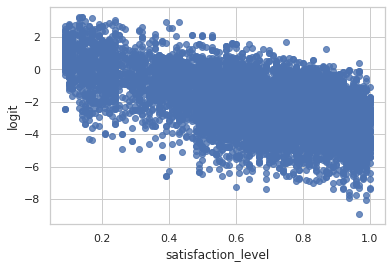

In [30]:
# Cheking assumptions of the Logistic Regression model

# 0. Get the predicted probabilities of the training data
training_probabilities = log_regression.predict_proba(X = X_train)

# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train

# 2. Create a new `logit` column in the `logit_data` df
logit_data["logit"] = np.log(training_probabilities[:, 1] / (1-training_probabilities[:, 1]))

# 3. Plot regplot of `activity_days` log-odds
sns.regplot(x="satisfaction_level", y="logit", data=logit_data, logistic=False, ci=None)

#linear relationship validated for the satisfaction_level variable

In [31]:
# Evaluation metrics for the logistic regression model
y_pred = log_regression.predict(X_test)

# Score the model (accuracy) on the test data
### YOUR CODE HERE ###
#print(log_regression.score(X_test, y_test)) > same result

# note: Accuracy measures the proportion of data points that are correctly classified
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))

# note: Precision measures the proportion of data points predicted as True that are actually True.
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))

# note: Recall measures the proportion of data points that are predicted as True, out of all the data points that are actually True
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred)) # correctly identified as churners

# note: 
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.802667
Precision: 0.622400
Recall: 0.435610
F1 Score: 0.512516


In [32]:
lg_results = pd.DataFrame({'model': "Logistic Regression (Validation)",
                    'precision': [metrics.precision_score(y_test, y_pred)],
                    'recall': [metrics.recall_score(y_test, y_pred)],
                    'F1': [metrics.f1_score(y_test, y_pred)],
                    'accuracy': [metrics.accuracy_score(y_test, y_pred)],
                    },
                )

lg_results

,model,precision,recall,F1,accuracy
0,Logistic Regression (Validation),0.6224,0.43561,0.512516,0.802667


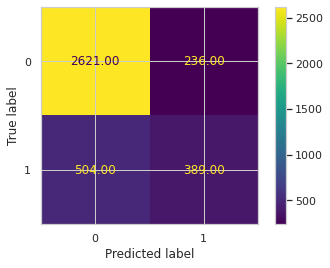

In [33]:
# Showing results in a cofusion matrix
cm_1 = metrics.confusion_matrix(y_test, y_pred, labels = log_regression.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_1, display_labels = log_regression.classes_)
disp.plot(values_format='.2f')  # values_format to control the number format

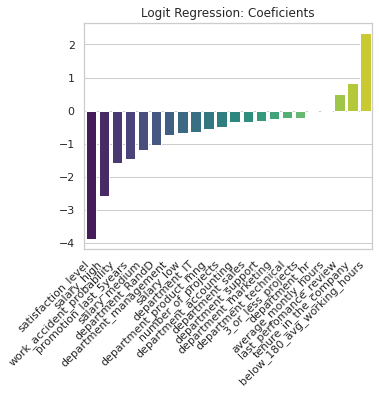

In [34]:
# Plot feature importance graph of the Logistic Regression Model
tuple_list =tuple(zip(log_reg_coeficcients.index.tolist(), log_reg_coeficcients))
tuple_list_sorted = sorted(tuple_list, key=lambda x: x[1])

# Extract names and values
coeficcients, values = zip(*tuple_list_sorted)

# Create the bar plot
sns.barplot(x=list(coeficcients), y=list(values), palette='viridis')

# Add a title
mplot.title('Logit Regression: Coeficients')
mplot.tight_layout()
mplot.xticks(rotation=45, ha="right")

# Show the plot
mplot.show()

# The variables with the most great impact are satisfaction_level, salary_high and below_180_avg_working_hours.
# Even when the model is not to good (Recall of 41%), these three variables need to be addressed to improve work satisfaction
# within the company

##### Random Forest Model

In [35]:
# 1. Split into train and test sets
# Split the data 80/20 into an interim training set and a test set. Don't forget to stratify 
# the splits, and set the random state to 42.

# Split the interim training set 75/25 into a training set and a validation set, 
# yielding a final ratio of 60/20/20 for training/validation/test sets. Again, 
# don't forget to stratify the splits and set the random state.

# Import packages for data modeling
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# This is the classifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# 1. Isolate variables
X = combined_df.copy()
X = X.drop("turnout", axis = 1)
y = combined_df["turnout"]


# 2. Split into train and validate sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.20, 
                                                    stratify=y, random_state=42)

# 3. Split into validation and test sets
### YOUR CODE HERE ###
X_tr_2, X_val_2, y_tr_2, y_val_2 = train_test_split(X_train_2, y_train_2, test_size = 0.25,
                                            stratify=y_train_2, random_state = 15)

# 4. Instantiate the random forest classifier
### YOUR CODE HERE ###
rf = RandomForestClassifier(random_state=0)

# 5. Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params = {'max_depth': [None, 4], 
             'max_features': [5,10,15,20],
             'max_samples': [2500, 5000],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [100, 300]             
             }  

# 6. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 7. Instantiate the GridSearchCV object (cross validation)
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=2, refit='recall', n_jobs = -1, verbose = 3)

# 8. Fit the model
rf_cv.fit(X_tr_2, y_tr_2)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  64 | elapsed:   17.3s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done  45 out of  64 | elapsed:   26.3s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   31.8s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [36]:
# see results of the Random Forest in training dataset
print(rf_cv.best_score_)
print("")
print(rf_cv.best_params_)


0.9155413409144753

{'max_depth': None, 'max_features': 20, 'max_samples': 2500, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
# Use the make results function to store the results
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [38]:
### YOUR CODE HERE ###
rf_cv_results = make_results('Random Forest CV Training', rf_cv, 'recall')
rf_cv_results

,model,precision,recall,F1,accuracy
0,Random Forest CV Training,0.977581,0.915541,0.945536,0.974886


##### Extreme Gradient Boosting Model

In [39]:
# 1. Instantiate the XGBoost classifier
### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

# 2. Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params_xgb = { 'max_depth': [None, 4],
              'min_child_weight': [0.1, 0.25, 0.5, None],
              'learning_rate': [0.01, 0.03, None],
              'n_estimators': [100, 300]  
             }   

# 3. Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring_2 = ['accuracy', 'precision', 'recall', 'f1']


# 4. Instantiate the GridSearchCV object
### YOUR CODE HERE ###
xgb_cv = GridSearchCV(xgb, cv_params_xgb, scoring=scoring_2, cv=5, refit='recall', n_jobs = -1, verbose = 3)

# 5. Fit XGBoost model
xgb_cv.fit(X_tr_2, y_tr_2)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01

In [40]:
# see results of the Random Forest in training dataset
print(xgb_cv.best_score_)
print("")
print(xgb_cv.best_params_)

0.9561379430538308

{'learning_rate': None, 'max_depth': None, 'min_child_weight': 0.25, 'n_estimators': 300}


In [41]:
# store results in a table
xgb_cv_results = make_results('XG Boost CV (Training)', xgb_cv, 'recall')
xgb_cv_results

,model,precision,recall,F1,accuracy
0,XG Boost CV (Training),0.979572,0.956138,0.96768,0.984776


##### Selecting the best model using validation data

1- Logistic Regresion 

In [42]:
lg_results

,model,precision,recall,F1,accuracy
0,Logistic Regression (Validation),0.6224,0.43561,0.512516,0.802667


2- Random Forest

In [43]:
# Use random forest model to predict on validation data
### YOUR CODE HERE ###
y_pred_rf = rf_cv.predict(X_val_2)

def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [44]:
# Get validation scores for RF model
### YOUR CODE HERE ###
rf_cv_results_2 = get_test_scores("Random Forest CV (Validation)", y_pred_rf, y_val_2)

# Append to the results table
### YOUR CODE HERE ###
df_appended = pd.concat([rf_cv_results, rf_cv_results_2], ignore_index=True)
df_appended

,model,precision,recall,F1,accuracy
0,Random Forest CV Training,0.977581,0.915541,0.945536,0.974886
1,Random Forest CV (Validation),0.984871,0.911765,0.946909,0.975667


3- XG Boosting

In [45]:
# Use XGBoost model to predict on validation data
### YOUR CODE HERE ###
y_pred_xgb_cv = xgb_cv.predict(X_val_2)

# Get validation scores for XGBoost model
### YOUR CODE HERE ###
xgb_cv_results_2 = get_test_scores("XG Boost CV (Validation)", y_pred_xgb_cv, y_val_2)

# Append to the results table
### YOUR CODE HERE ###
df_appended_2 = pd.concat([xgb_cv_results, xgb_cv_results_2], ignore_index=True)
df_appended_2

,model,precision,recall,F1,accuracy
0,XG Boost CV (Training),0.979572,0.956138,0.967680,0.984776
1,XG Boost CV (Validation),0.985612,0.959384,0.972321,0.987000


Since XG Boost has better scores compared to Random Forest (In each score, but for a little), and since the Logistic Regression model is far lower in each score,I select the XG Boost ML Model as the champion.

##### Use champion model to predict on test data

In [46]:
# Use XG Boost model to predict on test data
### YOUR CODE HERE ###
y_pred_test_xgb_cv = xgb_cv.predict(X_test_2)

# Get test scores for XGBoost model
### YOUR CODE HERE ###
xgb_cv_results_3 = get_test_scores("XG Boost CV (Testing)", y_pred_test_xgb_cv, y_test_2)

# Append to the results table
### YOUR CODE HERE ###
df_appended_3 = pd.concat([xgb_cv_results, xgb_cv_results_2, xgb_cv_results_3], ignore_index=True)
df_appended_3

,model,precision,recall,F1,accuracy
0,XG Boost CV (Training),0.979572,0.956138,0.967680,0.984776
1,XG Boost CV (Validation),0.985612,0.959384,0.972321,0.987000
2,XG Boost CV (Testing),0.982882,0.964986,0.973852,0.987667


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






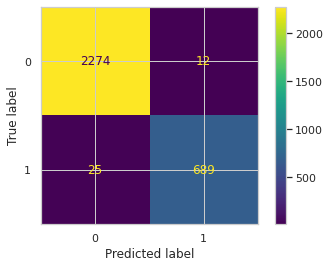

In [47]:
# Generate array of values for confusion matrix
### YOUR CODE HERE ###
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    mplot.show()

# Plot confusion matrix
### YOUR CODE HERE ###
conf_matrix_plot(xgb_cv, X_test_2, y_test_2)

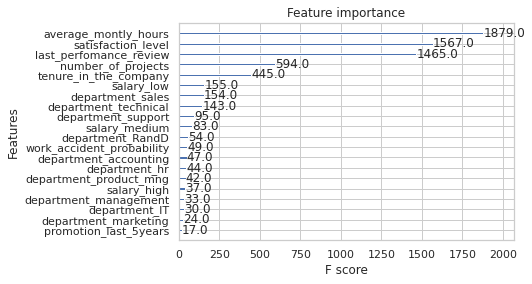

In [48]:
# generate plot with feature importance
plot_importance(xgb_cv.best_estimator_);

In [49]:
from sklearn.metrics import roc_curve, auc

# Compute the false positive rate (FPR) 
# and true positive rate (TPR) for different classification thresholds
y_pred_prob = xgb_cv.predict_proba(X_test_2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.9908792038250122

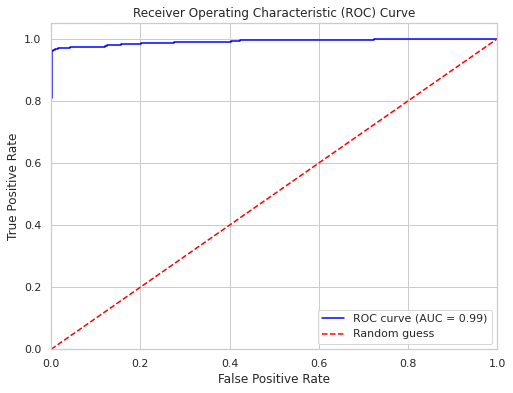

In [50]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

> We created a production ready ML model, a XGBoost model that has a 96.4% of recall (proportion of data points that are predicted as True, out of all the data points that are actually True). It also has Precision and Accuracy (measures the proportion of data points that are correctly classified) scores above 95%, which shows a great explanatory and prediction power. Also, this model has three major predictor variables: average monthly hours, satisfaction level and last performance review. 

> The main variable that is impacting the turnout rate is the average monthly hours. In particular, the mean of turnout employees is 225 monthly hours, and this one is 10% higher than the median of stayed employees of 200 monthly hours. That being said, reducing the laboral charge to 200 for this segment of workers, could help improving the retention of employees in the company. These are workers that had a very good performance review, so we need to take care of these good workers that are leaving the company. On the other hand, using the satisfaction level survey is a good tool to identify possible workers that are thinking on leaving the company. So, we can reduce the laboral hours of these workers, that had a good performance review last year and are saying that its satifaction level with the company is not good.  

> The same I mentioned above.

> I think the XGBoost model is a very robust model, and if the data we got from the company is representative of the population, can be used to stablish the HR retention strategy. I do not think it needs to be improved. 

> I can also mention the team that the promotions in last 5 years is not a good way to reward employees.Our employees value their time, so it is better to reward them with less, more focused, work in the company.

> For this part, the executive summary I did for the previous project was very usefull: https://github.com/cjmp21/waze_business_case_projects/blob/main/waze_ml_models_project/Waze_Machine_Learning_Models_Executive_Summary_CM.pdf

> I do not, since the only variable I considered problematic (work accident) is not relevant for the XGBoost model. In fact, a new model can be done without that variable and will not be affected by this.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

> We created a production ready ML model, a XGBoost model that has a 96.4% of recall (proportion of data points that are predicted as True, out of all the data points that are actually True). It also has Precision and Accuracy (measures the proportion of data points that are correctly classified) scores above 95%, which shows a great explanatory and prediction power. Also, this model has three major predictor variables: average monthly hours, satisfaction level and last performance review. From these three variables, the main variable that is impacting the turnout rate is the average monthly hours per employee. In particular, the mean work time per month of turnout employees is 225 hours, and it is 10% higher than the median of stayed employees (200 monthly hours). 

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

> Reducing the laboral charge for the segment of workers that are considering to leave the company will help improving the retention, since that is the most valued action considered by the workers of the company. The segment of workers that should receive this benefit are workers that had a very good performance review last year, and also that manifest low engagement with the company when asked through the satisfaction level survey. Based on our research, the laboral hours of these workers should be diminished from 225 to around 200 monthly hours. This is the best strategy to tackle the current HR problem.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.